
=== DISTRIBUIÇÃO DE CLASSES (PT-BR) ===

       Classe (PT)  Quantidade  Percentual (%)
   Ar-condicionado        1000       11.452130
   Buzina de carro         429        4.912964
Crianças brincando        1000       11.452130
Latido de cachorro        1000       11.452130
         Furadeira        1000       11.452130
 Motor funcionando        1000       11.452130
              Tiro         374        4.283097
Marreta pneumática        1000       11.452130
            Sirene         929       10.639029
     Música de rua        1000       11.452130


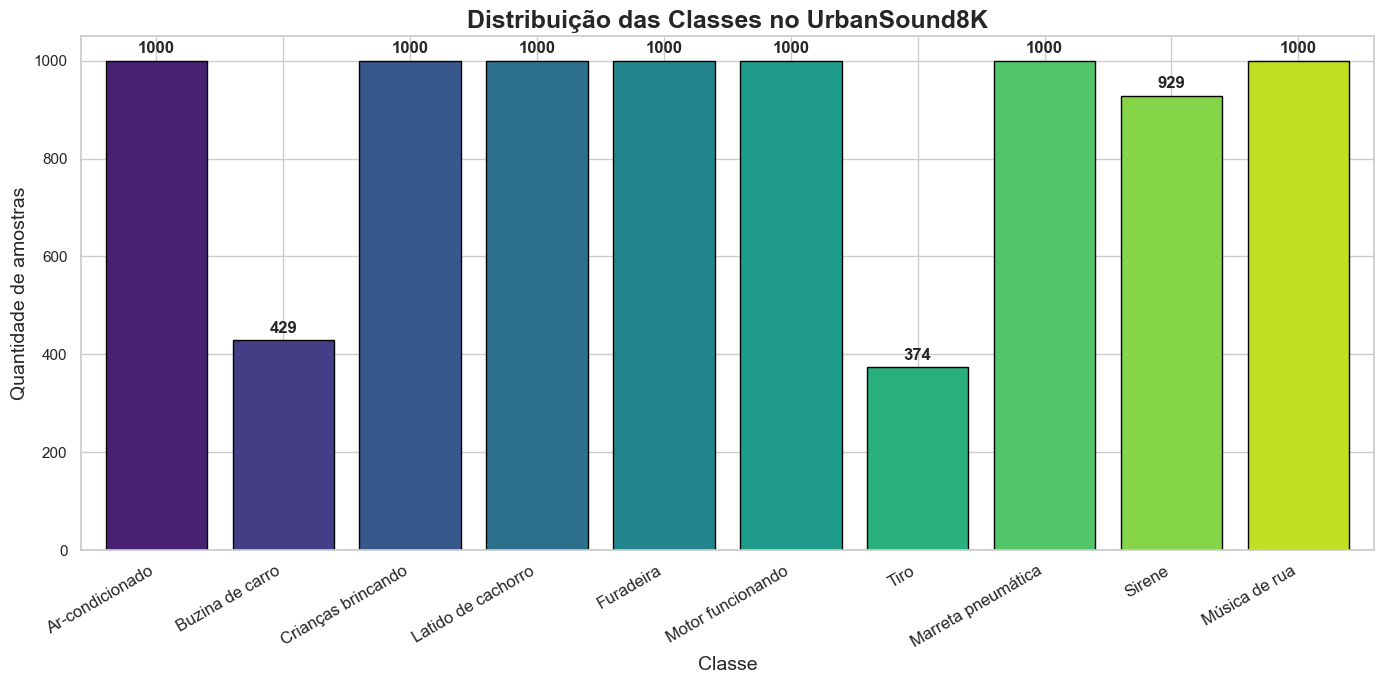


Figura salva em:
e:\ExameEET\results\figs\class_distribution_urbansound8k.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

# =============================
# CARREGAR METADADOS
# =============================
base_path = os.getcwd()
meta_path = os.path.join(base_path, "UrbanSound8K.csv")
metadata = pd.read_csv(meta_path)

# Pasta de saída das figuras
results_path = os.path.join(base_path, "results")
fig_path = os.path.join(results_path, "figs")
os.makedirs(fig_path, exist_ok=True)

# =============================
# MAPEAMENTO PARA PORTUGUÊS
# =============================
label_map_pt = {
    "air_conditioner": "Ar-condicionado",
    "car_horn": "Buzina de carro",
    "children_playing": "Crianças brincando",
    "dog_bark": "Latido de cachorro",
    "drilling": "Furadeira",
    "engine_idling": "Motor funcionando",
    "gun_shot": "Tiro",
    "jackhammer": "Marreta pneumática",
    "siren": "Sirene",
    "street_music": "Música de rua"
}

metadata["class_pt"] = metadata["class"].map(label_map_pt)

# =============================
# PROCESSAMENTO
# =============================
class_counts = metadata['class_pt'].value_counts().reindex(label_map_pt.values())
class_percent = 100 * class_counts / len(metadata)

df_balance = pd.DataFrame({
    "Classe (PT)": class_counts.index,
    "Quantidade": class_counts.values,
    "Percentual (%)": class_percent.values
})

print("\n=== DISTRIBUIÇÃO DE CLASSES (PT-BR) ===\n")
print(df_balance.to_string(index=False))

# =============================
# GRÁFICO PROFISSIONAL
# =============================
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid")

palette = sns.color_palette("viridis", len(df_balance))

bars = plt.bar(df_balance['Classe (PT)'], df_balance['Quantidade'], 
               color=palette, edgecolor="black")

# Adicionar valores nas barras
for bar, value in zip(bars, df_balance['Quantidade']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 15,
        f"{value}",
        ha='center',
        fontsize=12,
        fontweight='bold'
    )

plt.title("Distribuição das Classes no UrbanSound8K", fontsize=18, fontweight="bold")
plt.ylabel("Quantidade de amostras", fontsize=14)
plt.xlabel("Classe", fontsize=14)

plt.xticks(rotation=30, ha='right', fontsize=12)

plt.margins(x=0.02)
plt.tight_layout()

# ==== SALVAR FIGURA ====
output_file = os.path.join(fig_path, "class_distribution_urbansound8k.png")
plt.savefig(output_file, dpi=300)
plt.show()

print("\nFigura salva em:")
print(output_file)
